
<h1><center>EE769-ASSIGNMENT-2</center></h1>
<h2><center>Badal Varshney, 19D070015</center></h2>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Objective 1: Learn various steps and due diligence needed to train successful classification models.

#**Upload Data**

1. read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

In [3]:
#Reading data 
url="https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv "
df=pd.read_csv(url)
display(df)
print(df.isnull().sum(axis = 0))
for col in df.columns.values:
  print(str(df[col].dtypes))

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


DYRK1A_N                0
ITSN1_N                 0
BDNF_N                  0
NR1_N                   0
NR2A_N                  0
                     ... 
EGR1_N                180
H3MeK4_N              180
CaNA_N                  0
Genotype                0
Treatment_Behavior      0
Length: 79, dtype: int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object


#**Understanding the data**

2. Perform exploratory data analysis to find out:

a. Which variables are usable, and which are not?

b. Are there significant correlations among variables?

c. Are the classes balanced?

In [4]:
#Analysing the data
print(pd.unique(df['Genotype']))
print(df['Genotype'].value_counts())
print(pd.unique(df['Treatment_Behavior']))
print(df['Treatment_Behavior'].value_counts())
A=np.array(df.isnull().sum(axis = 0))
columns = list(df)[:77]
print(A)
for i in range(77):
  if(A[i]>0):
    print(columns[i],"=",A[i])

['Control' 'Ts65Dn']
Control    435
Ts65Dn     327
Name: Genotype, dtype: int64
['Memantine_C/S' 'Memantine_S/C' 'Saline_C/S' 'Saline_S/C']
Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  15   0   0   0   4   0   0   0  15   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 180 195   0  60
   0 150 180 180   0   0   0]
ELK_N = 15
MEK_N = 4
Bcatenin_N = 15
BAD_N = 180
BCL2_N = 195
pCFOS_N = 60
H3AcK18_N = 150
EGR1_N = 180
H3MeK4_N = 180


DYRK1A_N DYRK1A_N
DYRK1A_N ITSN1_N
DYRK1A_N BRAF_N
ITSN1_N DYRK1A_N
ITSN1_N ITSN1_N
BDNF_N BDNF_N
NR1_N NR1_N
NR2A_N NR2A_N
pAKT_N pAKT_N
pBRAF_N pBRAF_N
pCAMKII_N pCAMKII_N
pCREB_N pCREB_N
pELK_N pELK_N
pERK_N pERK_N
pJNK_N pJNK_N
PKCA_N PKCA_N
pMEK_N pMEK_N
pNR1_N pNR1_N
pNR2A_N pNR2A_N
pNR2B_N pNR2B_N
pPKCAB_N pPKCAB_N
pRSK_N pRSK_N
AKT_N AKT_N
BRAF_N DYRK1A_N
BRAF_N BRAF_N
CAMKII_N CAMKII_N
CREB_N CREB_N
ELK_N ELK_N
ERK_N ERK_N
GSK3B_N GSK3B_N
JNK_N JNK_N
MEK_N MEK_N
TRKA_N TRKA_N
RSK_N RSK_N
APP_N APP_N
Bcatenin_N Bcatenin_N
SOD1_N SOD1_N
MTOR_N MTOR_N
P38_N P38_N
pMTOR_N pMTOR_N
DSCR1_N DSCR1_N
AMPKA_N AMPKA_N
NR2B_N NR2B_N
pNUMB_N pNUMB_N
RAPTOR_N RAPTOR_N
TIAM1_N TIAM1_N
pP70S6_N pP70S6_N
NUMB_N NUMB_N
P70S6_N P70S6_N
pGSK3B_N pGSK3B_N
pPKCG_N pPKCG_N
CDK5_N CDK5_N
S6_N S6_N
ADARB1_N ADARB1_N
AcetylH3K9_N AcetylH3K9_N
RRP1_N RRP1_N
BAX_N BAX_N
ARC_N ARC_N
ARC_N pS6_N
ERBB4_N ERBB4_N
nNOS_N nNOS_N
Tau_N Tau_N
GFAP_N GFAP_N
GluR3_N GluR3_N
GluR4_N GluR4_N
IL1B_N IL1B_N
P3525_N P3

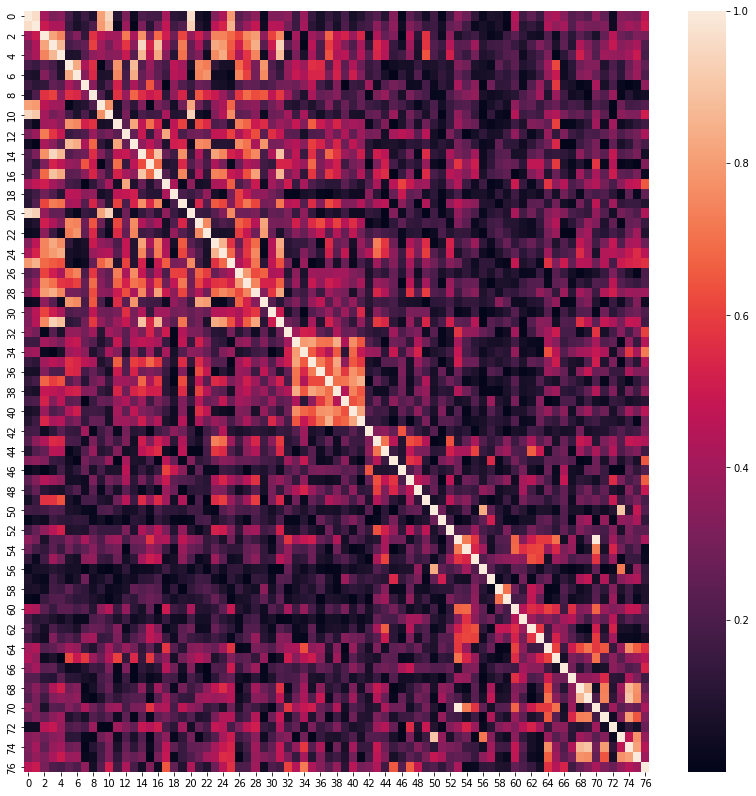

In [7]:
#Correlation calculation
columns = list(df)[:77]
corr=np.corrcoef(np.transpose(np.asarray(df[df.columns.values[:-2]])))
for i in range(77):
  for j  in range(77):
    if(corr[i][j]>0.95):
      print(columns[i],columns[j])
fig,ax=plt.subplots(figsize=(14,14))
sns.heatmap(abs(corr))
plt.show()

a. Which variables are usable, and which are not?

    ELK_N = 15
    MEK_N = 4
    Bcatenin_N = 15
    BAD_N = 180
    BCL2_N = 195
    pCFOS_N = 60
    H3AcK18_N = 150
    EGR1_N = 180
    H3MeK4_N = 180

b. Are there significant correlations among variables?
    
    Variables are not correlated except some like (above 0.95 correlation)-
    DYRK1A_N DYRK1A_N
    DYRK1A_N ITSN1_N
    DYRK1A_N BRAF_N
    ITSN1_N DYRK1A_N
    ITSN1_N ITSN1_N
    BDNF_N BDNF_N
    NR1_N NR1_N

c. Are the classes balanced?

    Yes the classes are fairly balanced,
    Memantine_C/S    225
    Memantine_S/C    225
    Saline_C/S       180
    Saline_S/C       132

    Control    435
    Ts65Dn     327

3. Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommended way is to use multivariate feature imputation

In [5]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df[df.columns.values[:-2]])
df[df.columns.values[:-2]]=imp.transform(df[df.columns.values[:-2]]) #Multivariate feature imputation transform
display(df)
A=df.isnull().sum(axis = 0)
np.asarray(A)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.107515,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.109055,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108598,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.118362,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.118030,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Used Multivariate Feature Imputation-It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion.

4. Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. Remember, you
have two separate classification tasks – one is binary, the other has four classes. You may have to do some
reading about multi-class classification metrics.

f1 score-The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is

    F1 = 2 * (precision * recall) / (precision + recall)

f1-micro:
Calculate metrics globally by counting the total true positives, false negatives and false positives.

5. Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable (I cannot
say “best” because you have two separate classifications to perform) hyper-parameter settings for the
following model types:

a. Linear SVM with regularization as hyperparameter 

b. RBF kernel SVM with kernel width and regularization as hyperparameters 

c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of
neurons, weight decay) 

d. Random forest (max tree depth, max number of variables per node)

6. Check feature importance for each model to see if the same proteins are important for each model. Read up
on how to find feature importance.

#Linear SVM

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import joblib
encoder = OrdinalEncoder();

In [ ]:
from sklearn import svm
X=np.array(df[df.columns.values[:-2]]);
y=encoder.fit_transform(np.array(df[df.columns.values[-2]]).reshape(-1,1));
y=y.flatten()

# Define the parameter grid to search over
param_grid=[{'estimator__kernel':["linear"],'estimator__C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]

# Instantiate the SVM model with an linear kernel
estimator = svm.SVC()
selector = RFE(estimator, step=15)

# Perform five-fold cross-validation using GridSearchCV
clf_SVM1 = GridSearchCV(selector, param_grid,scoring='f1', cv=5)
clf_SVM1.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", clf_SVM1.best_params_)
print("Best Score: ", clf_SVM1.best_score_)
# print(clf_SVM1.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_SVM1.cv_results_)

#save your model or results
joblib.dump(clf_SVM1, '/content/drive/MyDrive/EE769_A2/clf_SVM1.pkl')

Best hyperparameters:  {'estimator__C': 10.0, 'estimator__kernel': 'linear'}
Best Score:  0.741100120416972


['/content/drive/MyDrive/EE769_A2/clf_SVM1.pkl']

In [ ]:
y=encoder.fit_transform(np.array(df[df.columns.values[-1]]).reshape(-1,1));y=y.flatten()

# Define the parameter grid to search over
param_grid=[{'estimator__kernel':["linear"],'estimator__C': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]

# Instantiate the SVM model with an linear kernel
estimator = svm.SVC()
selector = RFE(estimator, step=15)

# Perform five-fold cross-validation using GridSearchCV
clf_SVM2 = GridSearchCV(selector, param_grid,scoring='f1_micro', cv=5)
clf_SVM2.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", clf_SVM2.best_params_)
print("Best Score: ", clf_SVM2.best_score_)
# print(clf_SVM2.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_SVM2.cv_results_)

#save your model or results
joblib.dump(clf_SVM2, '/content/drive/MyDrive/EE769_A2/clf_SVM2.pkl')

Best hyperparameters:  {'estimator__C': 100.0, 'estimator__kernel': 'linear'}
Best Score:  0.7559769521843825


['/content/drive/MyDrive/EE769_A2/clf_SVM2.pkl']

In [ ]:
def df_split(df, header):
    Y_train = df[header]
    X_train = df.drop(['Genotype', 'Treatment_Behavior'],axis=1)
    return X_train, Y_train

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC

x_train, y = df_split(df, 'Genotype')
enc = OrdinalEncoder()
y_train = enc.fit_transform(np.array(y).reshape(-1,1)).flatten()
# Create a linear SVM model
aa_svm = svm.SVC(kernel='linear', random_state=0, tol=1e-5, C=10)
aa_svm.fit(x_train, y_train)

# Get the feature importance
importances = abs(aa_svm.coef_[0])

    
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 30 (13.254125)
2. feature 28 (9.963239)
3. feature 1 (9.957522)
4. feature 58 (6.948552)
5. feature 20 (5.547519)
6. feature 41 (4.961076)
7. feature 61 (4.840983)
8. feature 36 (4.592090)
9. feature 33 (4.413247)
10. feature 72 (4.333889)
11. feature 39 (4.156504)
12. feature 60 (4.058459)
13. feature 14 (3.754210)
14. feature 16 (3.720768)
15. feature 12 (3.492519)
16. feature 66 (2.805784)
17. feature 8 (2.671577)
18. feature 37 (2.613796)
19. feature 5 (2.479933)
20. feature 24 (2.398306)
21. feature 44 (2.314640)
22. feature 55 (2.181267)
23. feature 18 (1.982605)
24. feature 42 (1.944777)
25. feature 43 (1.929899)
26. feature 48 (1.880147)
27. feature 40 (1.856707)
28. feature 54 (1.853392)
29. feature 59 (1.796938)
30. feature 3 (1.703168)
31. feature 71 (1.587815)
32. feature 22 (1.578454)
33. feature 67 (1.573857)
34. feature 34 (1.551269)
35. feature 47 (1.510965)
36. feature 38 (1.459302)
37. feature 31 (1.441524)
38. feature 27 (1.399683)
39. fea

#RBF Kernel SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

encoder = OrdinalEncoder();
X=np.array(df[df.columns.values[:-2]]);
y=encoder.fit_transform(np.array(df[df.columns.values[-2]]).reshape(-1,1));y=y.flatten()

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Instantiate the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf')

# Perform five-fold cross-validation using GridSearchCV
clf_RBF1 = GridSearchCV(svm_rbf, param_grid, scoring='f1',cv=5)
clf_RBF1.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", clf_RBF1.best_params_)
print("Best Score: ", clf_RBF1.best_score_)
pd.DataFrame.from_dict(clf_RBF1.cv_results_)

#save your model or results
joblib.dump(clf_RBF1, '/content/drive/MyDrive/EE769_A2/clf_RBF1.pkl')

Best hyperparameters:  {'C': 100, 'gamma': 0.01}
Best Score:  0.7410116060943435


['/content/drive/MyDrive/EE769_A2/clf_RBF1.pkl']

In [ ]:
y=encoder.fit_transform(np.array(df[df.columns.values[-1]]).reshape(-1,1));y=y.flatten()

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Instantiate the SVM model with an RBF kernel
svm_rbf = SVC(kernel='rbf')

# Perform five-fold cross-validation using GridSearchCV
clf_RBF2 = GridSearchCV(svm_rbf, param_grid, scoring='f1_micro',cv=5)
clf_RBF2.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", clf_RBF2.best_params_)
print("Best Score: ", clf_RBF2.best_score_)
pd.DataFrame.from_dict(clf_RBF2.cv_results_)

#save your model or results
joblib.dump(clf_RBF2, '/content/drive/MyDrive/EE769_A2/clf_RBF2.pkl')

Best hyperparameters:  {'C': 100, 'gamma': 0.01}
Best Score:  0.7243034055727553


['/content/drive/MyDrive/EE769_A2/clf_RBF2.pkl']

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

x_train, y = df_split(df, 'Genotype')
enc = OrdinalEncoder()
y_train = enc.fit_transform(np.array(y).reshape(-1,1)).flatten()
# Create a linear SVM model
aa_rbf = svm.SVC(kernel='rbf', random_state=0, tol=1e-5, C=100, gamma=0.01)
aa_rbf.fit(x_train, y_train)

# Get the feature importance
results = permutation_importance(aa_rbf, x_train, y_train, scoring='f1')
importance = results.importances_mean
    
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 30 (13.254125)
2. feature 28 (9.963239)
3. feature 1 (9.957522)
4. feature 58 (6.948552)
5. feature 20 (5.547519)
6. feature 41 (4.961076)
7. feature 61 (4.840983)
8. feature 36 (4.592090)
9. feature 33 (4.413247)
10. feature 72 (4.333889)
11. feature 39 (4.156504)
12. feature 60 (4.058459)
13. feature 14 (3.754210)
14. feature 16 (3.720768)
15. feature 12 (3.492519)
16. feature 66 (2.805784)
17. feature 8 (2.671577)
18. feature 37 (2.613796)
19. feature 5 (2.479933)
20. feature 24 (2.398306)
21. feature 44 (2.314640)
22. feature 55 (2.181267)
23. feature 18 (1.982605)
24. feature 42 (1.944777)
25. feature 43 (1.929899)
26. feature 48 (1.880147)
27. feature 40 (1.856707)
28. feature 54 (1.853392)
29. feature 59 (1.796938)
30. feature 3 (1.703168)
31. feature 71 (1.587815)
32. feature 22 (1.578454)
33. feature 67 (1.573857)
34. feature 34 (1.551269)
35. feature 47 (1.510965)
36. feature 38 (1.459302)
37. feature 31 (1.441524)
38. feature 27 (1.399683)
39. fea

#Neural Networks

In [ ]:
class manual_feature_importance_getter:

    def __init__ (self, estimator, transform_func=None, norm_order=1):
        self.estimator = estimator
        self.transform_func = transform_func
        self.norm_order = norm_order

    def __call__(self, estimator):

        # Get the base estimator from the regression chain
        #estimator = estimator.base_estimator

        # This is modified from the SKLearn > Feature Selection > _base.py file
        if hasattr(estimator, 'coef_'):
            #print('yay!')
            getter = attrgetter('coef_')
            importances = getter(estimator)

        elif hasattr(estimator, 'feature_importances_'):
            #print('yay!')
            getter = attrgetter('feature_importances_')
            importances = getter(estimator)
        
        else:
            #print('DOH!')
            importances = np.zeros(shape=(X.shape[1],1))
        

        if self.transform_func is None:
            return importances
        elif self.transform_func == "norm":
            if importances.ndim == 1:
                importances = np.abs(importances)
            else:
                importances = np.linalg.norm(importances, axis=0,
                                             ord=self.norm_order)
        elif self.transform_func == "square":
            if importances.ndim == 1:
                importances = safe_sqr(importances)
            else:
                importances = safe_sqr(importances).sum(axis=0)
        else:
            raise ValueError("Valid values for `self.transform_func` are " +
                             "None, 'norm' and 'square'. Those two " +
                             "transformation are only supported now")

        return importances

In [ ]:
from sklearn.neural_network import MLPClassifier

y=encoder.fit_transform(np.array(df[df.columns.values[-2]]).reshape(-1,1));y=y.flatten()

# Define the parameter grid to search over
param_grid = [{'estimator__solver':['lbfgs'], 'estimator__learning_rate_init':[0.01,0.1,0.7],
'estimator__hidden_layer_sizes':[2,10,100],'estimator__max_iter':[10000]}]

# Instantiate the NN model
estimator = MLPClassifier()
selector = RFE(estimator, step=15,importance_getter=manual_feature_importance_getter(estimator,None,1))     #RFECV(estimator=RegressorChain(base_estimator=estimator, order=[0, 1, 3, 4, 2, 5]), importance_getter=manual_feature_importance_getter(RegressorChain(base_estimator=estimator, order=[0, 1, 3, 4, 2, 5]), None, 1))

# Perform five-fold cross-validation using GridSearchCV
clf_NN1 = GridSearchCV(selector, param_grid,scoring='f1', cv=5)
clf_NN1.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", clf_NN1.best_params_)
print("Best Score: ", clf_NN1.best_score_)
# print(clf_NN1.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_NN1.cv_results_)


#save your model or results
joblib.dump(clf_NN1, '/content/drive/MyDrive/EE769_A2/clf_NN1.pkl')

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iter

Best hyperparameters:  {'estimator__hidden_layer_sizes': 100, 'estimator__learning_rate_init': 0.01, 'estimator__max_iter': 10000, 'estimator__solver': 'lbfgs'}
Best Score:  0.5814348965628056


['/content/drive/MyDrive/EE769_A2/clf_NN1.pkl']

In [ ]:
encoder = OrdinalEncoder();y=encoder.fit_transform(np.array(df[df.columns.values[-1]]).reshape(-1,1));y=y.flatten()
X=np.array(df[df.columns.values[:-2]]);

# Define the parameter grid to search over
param_grid = [{'estimator__solver':['lbfgs'], 'estimator__learning_rate_init':[0.01,0.1,0.7],
'estimator__hidden_layer_sizes':[2,10,100],'estimator__max_iter':[10000]}]

# Instantiate the NN model
estimator = MLPClassifier()
selector = RFE(estimator, step=15,importance_getter=manual_feature_importance_getter(estimator,None,1))     #RFECV(estimator=RegressorChain(base_estimator=estimator, order=[0, 1, 3, 4, 2, 5]), importance_getter=manual_feature_importance_getter(RegressorChain(base_estimator=estimator, order=[0, 1, 3, 4, 2, 5]), None, 1))

# Perform five-fold cross-validation using GridSearchCV
clf_NN2 = GridSearchCV(selector, param_grid,scoring='f1_micro', cv=5)
clf_NN2.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", clf_NN2.best_params_)
print("Best Score: ", clf_NN2.best_score_)
# print(clf_NN2.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_NN2.cv_results_)

#save your model or results
joblib.dump(clf_NN2, '/content/drive/MyDrive/EE769_A2/clf_NN2.pkl')

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the n

Best hyperparameters:  {'estimator__hidden_layer_sizes': 100, 'estimator__learning_rate_init': 0.7, 'estimator__max_iter': 10000, 'estimator__solver': 'lbfgs'}
Best Score:  0.6601049191606467


['/content/drive/MyDrive/EE769_A2/clf_NN2.pkl']

In [ ]:
from sklearn.neural_network import MLPClassifier

x_train, y = df_split(df, 'Genotype')
enc = OrdinalEncoder()
y_train = enc.fit_transform(np.array(y).reshape(-1,1)).flatten()
# Create an MLP classifier with a single hidden layer
clf = MLPClassifier(hidden_layer_sizes= 10, activation='relu', solver='lbfgs', alpha=0.1, 
                    max_iter=10000)
# Train the classifier on your dataset
clf.fit(x_train, y_train)

from sklearn.inspection import permutation_importance

# Estimate feature importance using permutation importance|
result = permutation_importance(clf, x_train, y_train, n_repeats=10, scoring='f1')

# Get the feature importances and their indices
feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

for i in range(x_train.shape[1]):
    feature_index = feature_indices[i]
    feature_name = x_train.columns[feature_index]
    feature_importance = feature_importances[feature_index]
    print(f"{i+1}. feature {feature_index} ({feature_name}): {feature_importance:.4f}")

1. feature 1 (ITSN1_N): 0.3472
2. feature 24 (ERK_N): 0.2475
3. feature 16 (pNR2B_N): 0.0855
4. feature 3 (NR1_N): 0.0638
5. feature 28 (TRKA_N): 0.0597
6. feature 76 (CaNA_N): 0.0577
7. feature 50 (AcetylH3K9_N): 0.0507
8. feature 20 (BRAF_N): 0.0465
9. feature 46 (pPKCG_N): 0.0397
10. feature 7 (pCAMKII_N): 0.0375
11. feature 9 (pELK_N): 0.0347
12. feature 14 (pNR1_N): 0.0263
13. feature 23 (ELK_N): 0.0241
14. feature 30 (APP_N): 0.0221
15. feature 36 (DSCR1_N): 0.0192
16. feature 66 (pGSK3B_Tyr216_N): 0.0152
17. feature 17 (pPKCAB_N): 0.0147
18. feature 10 (pERK_N): 0.0126
19. feature 25 (GSK3B_N): 0.0081
20. feature 65 (Ubiquitin_N): 0.0066
21. feature 0 (DYRK1A_N): 0.0062
22. feature 44 (P70S6_N): 0.0055
23. feature 32 (SOD1_N): 0.0049
24. feature 63 (PSD95_N): 0.0038
25. feature 41 (TIAM1_N): 0.0034
26. feature 4 (NR2A_N): 0.0031
27. feature 19 (AKT_N): 0.0025
28. feature 5 (pAKT_N): 0.0020
29. feature 58 (GluR3_N): 0.0020
30. feature 60 (IL1B_N): 0.0020
31. feature 18 (pRSK_N): 

#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
y=encoder.fit_transform(np.array(df[df.columns.values[-2]]).reshape(-1,1));y=y.flatten()

# Define the parameter grid to search over
param_grid=[{'estimator__n_estimators':[100,300,500],'estimator__max_depth': [2,3],'estimator__max_features':["auto", "sqrt", "log2"]}]

# Instantiate the RF model
estimator = RandomForestClassifier()
selector = RFE(estimator, step=15)

# Perform five-fold cross-validation using GridSearchCV
clf_RF1 = GridSearchCV(selector, param_grid,scoring='f1', cv=5)
clf_RF1.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", clf_RF1.best_params_)
print("Best Score: ", clf_RF1.best_score_)
# print(clf_RF1.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_RF1.cv_results_)

#save your model or results
joblib.dump(clf_RF1, '/content/drive/MyDrive/EE769_A2/clf_RF1.pkl')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Best hyperparameters:  {'estimator__max_depth': 3, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 100}
Best Score:  0.5843732957171622


['/content/drive/MyDrive/EE769_A2/clf_RF1.pkl']

In [ ]:
y=encoder.fit_transform(np.array(df[df.columns.values[-1]]).reshape(-1,1));y=y.flatten()

# Define the parameter grid to search over
param_grid=[{'estimator__n_estimators':[100,500],'estimator__max_depth': [3,10,50],'estimator__max_features':["auto", "sqrt", "log2"]}]

# Instantiate the RF model
estimator = RandomForestClassifier()
selector = RFE(estimator, step=15)

# Perform five-fold cross-validation using GridSearchCV
clf_RF2 = GridSearchCV(selector, param_grid,scoring='f1_micro', cv=5)
clf_RF2.fit(X, y)

# Print the best hyperparameters found
print("Best hyperparameters: ", clf_RF2.best_params_)
print("Best Score: ", clf_RF2.best_score_)
# print(clf_RF2.best_estimator_.ranking_)
pd.DataFrame.from_dict(clf_RF2.cv_results_)

#save your model or results
joblib.dump(clf_RF2, '/content/drive/MyDrive/EE769_A2/clf_RF2.pkl')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Best hyperparameters:  {'estimator__max_depth': 50, 'estimator__max_features': 'log2', 'estimator__n_estimators': 100}
Best Score:  0.6613519091847265


['/content/drive/MyDrive/EE769_A2/clf_RF2.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

x_train, y = df_split(df, 'Genotype')
enc = OrdinalEncoder()
y_train = enc.fit_transform(np.array(y).reshape(-1,1)).flatten()
# Create a random forest classifier object
rf = RandomForestClassifier(max_depth=3, max_features=300)

# Train the model on the input data
rf.fit(x_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 30 (0.491247)
2. feature 37 (0.093538)
3. feature 58 (0.061240)
4. feature 14 (0.055811)
5. feature 38 (0.050317)
6. feature 1 (0.046442)
7. feature 33 (0.030661)
8. feature 23 (0.026282)
9. feature 46 (0.020315)
10. feature 56 (0.013561)
11. feature 39 (0.013489)
12. feature 32 (0.010328)
13. feature 24 (0.009284)
14. feature 50 (0.006271)
15. feature 35 (0.005901)
16. feature 48 (0.005235)
17. feature 5 (0.004299)
18. feature 4 (0.003486)
19. feature 3 (0.003422)
20. feature 36 (0.003301)
21. feature 57 (0.002890)
22. feature 21 (0.002722)
23. feature 2 (0.002500)
24. feature 52 (0.002448)
25. feature 73 (0.002446)
26. feature 49 (0.002437)
27. feature 41 (0.002302)
28. feature 45 (0.002292)
29. feature 54 (0.002195)
30. feature 29 (0.001903)
31. feature 71 (0.001356)
32. feature 8 (0.001299)
33. feature 22 (0.001293)
34. feature 18 (0.001242)
35. feature 19 (0.001021)
36. feature 51 (0.001014)
37. feature 20 (0.000956)
38. feature 43 (0.000924)
39. featur

7. See if removing some features systematically will improve your models (e.g. using recursive feature
elimination https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).

In [ ]:
clf_SVM1=joblib.load("/content/drive/MyDrive/EE769_A2/clf_SVM1.pkl")
clf_SVM2=joblib.load("/content/drive/MyDrive/EE769_A2/clf_SVM2.pkl")
clf_RBF1=joblib.load("/content/drive/MyDrive/EE769_A2/clf_RBF1.pkl")
clf_RBF2=joblib.load("/content/drive/MyDrive/EE769_A2/clf_RBF2.pkl")
clf_RF1=joblib.load("/content/drive/MyDrive/EE769_A2/clf_RF1.pkl")
clf_RF2=joblib.load("/content/drive/MyDrive/EE769_A2/clf_RF2.pkl")
clf_NN1=joblib.load("/content/drive/MyDrive/EE769_A2/clf_NN1.pkl")
clf_NN2=joblib.load("/content/drive/MyDrive/EE769_A2/clf_NN2.pkl")

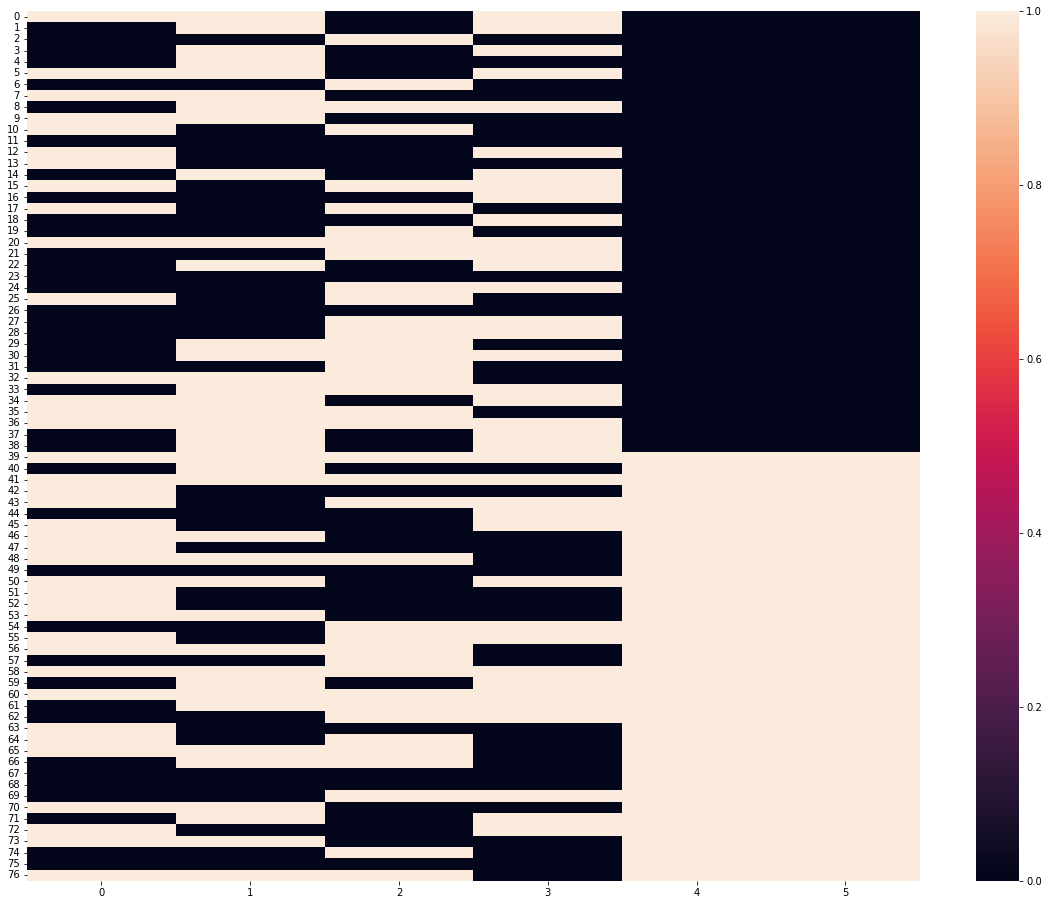

[['pNUMB_N']
 ['TIAM1_N']
 ['NUMB_N']
 ['S6_N']
 ['AcetylH3K9_N']
 ['nNOS_N']
 ['Tau_N']
 ['GluR3_N']
 ['IL1B_N']
 ['P3525_N']
 ['Ubiquitin_N']
 ['CaNA_N']] [[39]
 [41]
 [43]
 [48]
 [50]
 [55]
 [56]
 [58]
 [60]
 [61]
 [65]
 [76]]


<ipython-input-25-d4e6835dd843>:32: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(df.columns[np.argwhere((z+A1+A2+B1+B2+D1+D2)>=5)],np.argwhere((z+A1+A2+B1+B2+D1+D2)>=5))


In [ ]:
A=np.reshape(clf_RF2.best_estimator_.support_,(1,-1));
B=np.reshape(clf_RF1.best_estimator_.support_,(1,-1));

C=np.reshape(clf_SVM2.best_estimator_.support_,(1,-1));
D=np.reshape(clf_SVM1.best_estimator_.support_,(1,-1));

# E=np.reshape(clf_RBF2.best_estimator_.support_,(1,-1));
# F=np.reshape(clf_RBF1.best_estimator_.support_,(1,-1));

G=np.reshape(clf_NN2.best_estimator_.support_,(1,-1));
H=np.reshape(clf_NN1.best_estimator_.support_,(1,-1));

S=np.transpose(np.concatenate((A,B,C,D,G,H)))
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(S)
plt.show()


A1=np.array(clf_RF1.best_estimator_.support_)
A2=np.array(clf_RF2.best_estimator_.support_)

B1=np.array(clf_SVM1.best_estimator_.support_)
B2=np.array(clf_SVM2.best_estimator_.support_)

# C1=np.array(clf_RBF1.best_estimator_.support_)
# C2=np.array(clf_RBF2.best_estimator_.support_)

D1=np.array(clf_NN1.best_estimator_.support_)
D2=np.array(clf_NN2.best_estimator_.support_)

z=np.zeros(np.shape(A1))
print(df.columns[np.argwhere((z+A1+A2+B1+B2+D1+D2)>=5)],np.argwhere((z+A1+A2+B1+B2+D1+D2)>=5))

Since RFECV was taking huge amount of time to execute used RFE with n_features/2 as the default parameter.
We can see that the features are not uniformly important for different classifiers. Proteins like 

[['pNUMB_N']
 ['TIAM1_N']
 ['NUMB_N']
 ['S6_N']
 ['nNOS_N']
 ['Tau_N']
 ['GluR3_N']
 ['IL1B_N']
 ['P3525_N']
 ['Ubiquitin_N']
 ['SYP_N']]are very important for all the classes and are present in more than 5 classifiers.

Also, there is no availability of RFE function for RBF kernel.

8. Finally, test a few promising models on the test data:
https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
url="https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv "
df_test=pd.read_csv(url)

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_test[df_test.columns.values[:-2]])
df_test[df_test.columns.values[:-2]]=imp.transform(df_test[df_test.columns.values[:-2]])
# display(df_test)
X_test=np.array(df_test[df_test.columns.values[:-2]]);

# print((clf_RBF1.best_estimator_.predict(X_test)))
# print(clf_RBF2.best_estimator_.predict(X_test))

encoder1 = OrdinalEncoder();y=encoder1.fit_transform(np.array(df_test[df_test.columns.values[-2]]).reshape(-1,1));y1=y.flatten();
encoder = OrdinalEncoder();y=encoder.fit_transform(np.array(df_test[df_test.columns.values[-1]]).reshape(-1,1));y2=y.flatten()


print('f1_score(SVM1):', f1_score(y1,clf_SVM1.best_estimator_.predict(X_test)))
print('f1_score(SVM2):',f1_score(y2,clf_SVM2.best_estimator_.predict(X_test),average='micro'))



print('f1_score(RBF1):',f1_score(y1,clf_RBF1.best_estimator_.predict(X_test)))
print('f1_score(RBF2):',f1_score(y2,clf_RBF2.best_estimator_.predict(X_test),average='micro'))


print('f1_score(NN1):',f1_score(y1,clf_NN1.best_estimator_.predict(X_test)))
print('f1_score(NN2):',f1_score(y2,clf_NN2.best_estimator_.predict(X_test),average='micro'))



print('f1_score(RF1):',f1_score(y1,clf_RF1.best_estimator_.predict(X_test)))
print('f1_score(RF1):',f1_score(y2,clf_RF2.best_estimator_.predict(X_test),average='micro'))


# print(encoder1.inverse_transform(clf_SVM1.best_estimator_.predict(X_test).reshape(-1,1)))
# print(encoder.inverse_transform(clf_SVM2.best_estimator_.predict(X_test).reshape(-1,1)))

f1_score(SVM1): 0.8186528497409326
f1_score(SVM2): 0.8133333333333334
f1_score(RBF1): 0.7853403141361257
f1_score(RBF2): 0.7555555555555555
f1_score(NN1): 0.5638297872340425
f1_score(NN2): 0.7555555555555555
f1_score(RF1): 0.6432748538011697
f1_score(RF1): 0.7377777777777778


<AxesSubplot:>

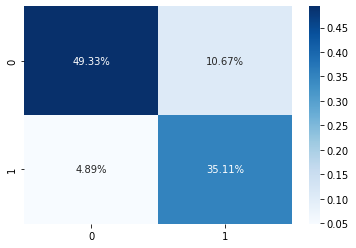

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y1,clf_SVM1.best_estimator_.predict(X_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

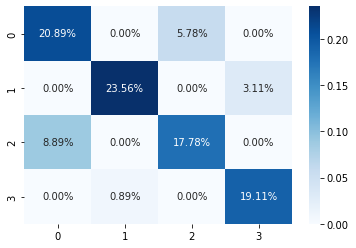

In [ ]:
cf_matrix = confusion_matrix(y2,clf_SVM2.best_estimator_.predict(X_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

From the confusion matrix its clear that false negatives/positives are very less in percentage hence model is a decent classifier.

Objective 2: Practice using pre-trained neural networks to extract domain-specific features for new tasks.
9. Read the pytorch tutorial to use a pre-trained “ConvNet as fixed feature extractor” from 
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html and you can ignore “finetuning the
ConvNet”. Test this code out to see if it runs properly in your environment after eliminating code blocks that
you do not need.

In [1]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/EE769_A2/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


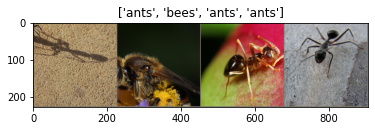

In [3]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [4]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_loss=[]

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase=='train':
              train_loss.append(epoch_loss)
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model,train_loss

In [5]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [6]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


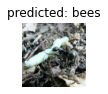

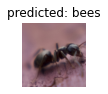

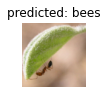

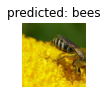

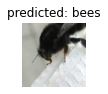

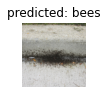

In [7]:
visualize_model(model_conv)

plt.ioff()
plt.show()

In [12]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6860 Acc: 0.6434
val Loss: 0.2018 Acc: 0.9412

Epoch 1/24
----------
train Loss: 0.4095 Acc: 0.8156
val Loss: 0.1718 Acc: 0.9477

Epoch 2/24
----------
train Loss: 0.5157 Acc: 0.7705
val Loss: 0.1968 Acc: 0.9412

Epoch 3/24
----------
train Loss: 0.4363 Acc: 0.8033
val Loss: 0.1893 Acc: 0.9477

Epoch 4/24
----------
train Loss: 0.6782 Acc: 0.7541
val Loss: 0.4804 Acc: 0.7843

Epoch 5/24
----------
train Loss: 0.4769 Acc: 0.8197
val Loss: 0.1884 Acc: 0.9346

Epoch 6/24
----------
train Loss: 0.5154 Acc: 0.7705
val Loss: 0.3546 Acc: 0.8824

Epoch 7/24
----------
train Loss: 0.5364 Acc: 0.7869
val Loss: 0.1781 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.3465 Acc: 0.8443
val Loss: 0.2082 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.3019 Acc: 0.8852
val Loss: 0.1994 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.3660 Acc: 0.8361
val Loss: 0.1688 Acc: 0.9216

Epoch 11/24
----------
train Loss: 0.3978 Acc: 0.8402
val Loss: 0.1788 Acc: 0.9477

Ep

10. Write a function that outputs ResNet18 features for a given input image. Extract features for training images
(in image_datasets['train']). You should get an Nx512 dimensional array. 

In [8]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

resnet = torchvision.models.resnet18(pretrained=True)
modules = list(resnet.children())[:-1]
resnet_conv = nn.Sequential(*modules)
for p in resnet_conv.parameters():
    p.requires_grad = False

def get_resnet_features(image_path):
    input_image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
    with torch.no_grad():
        resnet_conv.eval()
        features = resnet_conv(input_batch)
    return features.squeeze().numpy()

In [9]:
train_features = []
train_labels = []
for inputs, labels in dataloaders['train']:
    for i in range(inputs.size()[0]-1):
        img_path = image_datasets['train'].imgs[len(train_features)+i][0]
        # Get the ResNet18 features for the current image
        train_features.append(get_resnet_features(img_path))
        # Append the features to the list of training features
        train_labels.append(labels[i])
# Convert the list of training features to a numpy array      
train_features = np.array(train_features)
train_labels = np.array(train_labels)
train_features.shape

(183, 512)

11. Compare L2 regularized logistic regression, RBF kernel SVM (do grid search on kernel width and
regularization), and random forest (do grid search on max depth and number of trees). Test the final model
on test data and show the results -- accuracy and F1 score.

In [10]:
# Testing
test_features = []
test_labels = []
for inputs, labels in dataloaders['val']:
    for i in range(inputs.size()[0]-1):
        img_path = image_datasets['val'].imgs[len(test_features)+i][0]
        # Get the ResNet18 features for the current image
        test_features.append(get_resnet_features(img_path))
        # Append the features to the list of training features
        test_labels.append(labels[i])
# Convert the list of training features to a numpy array 
test_features = np.array(test_features)
test_labels = np.array(test_labels)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.fit_transform(test_features)

# L2 regularized logistic regression
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=500)
params_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
clf_logreg = GridSearchCV(logreg, params_logreg, scoring='f1', cv=5)
clf_logreg.fit(train_features_scaled, train_labels)
y_pred = clf_logreg.predict(test_features_scaled)
acc = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
print(f"Logistic Regression: Accuracy = {acc}, F1 score = {f1}")
print("Logistic Regression - Best params: ", clf_logreg.best_params_)

# RBF kernel SVM
svc = SVC(kernel='rbf')
params_svc = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}
clf_svc = GridSearchCV(svc, params_svc, scoring='f1', cv=5)
clf_svc.fit(train_features_scaled, train_labels)
y_pred = clf_svc.predict(test_features_scaled)
acc = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
print(f"RBF SVM: Accuracy = {acc}, F1 score = {f1}")
print("SVM - Best params: ", clf_svc.best_params_)

# Random forest
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200, 500], 'max_depth': [5, 10, 20, 50, None]}
clf_rf = GridSearchCV(rf, params_rf, scoring='f1', cv=5)
clf_rf.fit(train_features_scaled, train_labels)
y_pred = clf_rf.predict(test_features_scaled)
acc = accuracy_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)
print(f"Random Forest: Accuracy = {acc}, F1 score = {f1}")
print("Random Forest - Best params: ", clf_rf.best_params_)

Logistic Regression: Accuracy = 0.45614035087719296, F1 score = 0.5303030303030303
Logistic Regression - Best params:  {'C': 0.001}
RBF SVM: Accuracy = 0.5526315789473685, F1 score = 0.711864406779661
SVM - Best params:  {'C': 0.1, 'gamma': 0.001}
Random Forest: Accuracy = 0.41228070175438597, F1 score = 0.4369747899159664
Random Forest - Best params:  {'max_depth': 5, 'n_estimators': 50}


##Obsevation


**Amongst**  all the classifiers
 Linear SVM performed the best with f1 score of ~0.75 for both the classification.

 **Parameters**-


Binary, RFE(estimator=RandomForestClassifier(max_depth=3, max_features='sqrt',
                                     n_estimators=100))

Multi-class, RFE(estimator=RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=100))
    
Binary, RFE(estimator=SVC(C=10.0,  kernel='linear')

Multi-class, RFE(estimator=SVC(C=100.0, kernel='linear')

Binary, RFE(estimator=SVC(C=100.0, gamma=0.01,  kernel='rbf')

Multi-class, RFE(estimator=SVC(C=100.0, gamma=0.01, kernel='rbf')

Binary, RFE(estimator=MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.7,
                            max_iter=10000, solver='lbfgs')


Multi-class, RFE(estimator=MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01,
                            max_iter=10000, solver='lbfgs'),

**Thoughts**

For random forest the multiclass classification required more number of nodes/max_depth.
For SVC linear kernels proved better than and rbf.
For Neural network bigger hidden layer sizes gave better performance.


**Test Results- For Linear SVM**

Binary=0.8186528497409326

Multi-class=0.8133333333333334

The Test score is better than traning-validation score which tells us that model is not overfitted.

From the confusion matrix its clear that false negatives/positives are very less in percentage hence model is a decent classifier.

##References
1)https://stackoverflow.com/questions/51424312/how-to-save-gridsearchcv-object

2)https://stackoverflow.com/questions/69428789/get-feature-importances-using-sklearn-rfecv-with-multi-output-regression-chain

3)https://stackoverflow.com/questions/40905389/in-python-how-do-we-find-the-correlation-coefficient-between-two-matrices

4)https://stackoverflow.com/questions/45330240/scikit-learn-selectfrommodel-actually-obtain-the-feature-importance-scores-of

5)https://stackoverflow.com/questions/23815938/recursive-feature-elimination-and-grid-search-using-scikit-learn

6)https://stackoverflow.com/questions/40057049/using-confusion-matrix-as-scoring-metric-in-cross-validation-in-scikit-learn

7)https://www.geeksforgeeks.org/residual-networks-resnet-deep-learning/

8)https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

I was discuss the Task 5,6,7 with Athrava Warhade (190070012) but all the codes lines were written by myself individually.